In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

So far, I have mutation rate measurements for 10 different concentrations of iptg (different amounts of mutL induced) along with full induction of mutH (via aTc). Taking the numbers from the 2 February notebook, the 7 February Notebook, and the 2 mM iptg concentrations from the measurements of the mutH induction curve, I get the following graph.

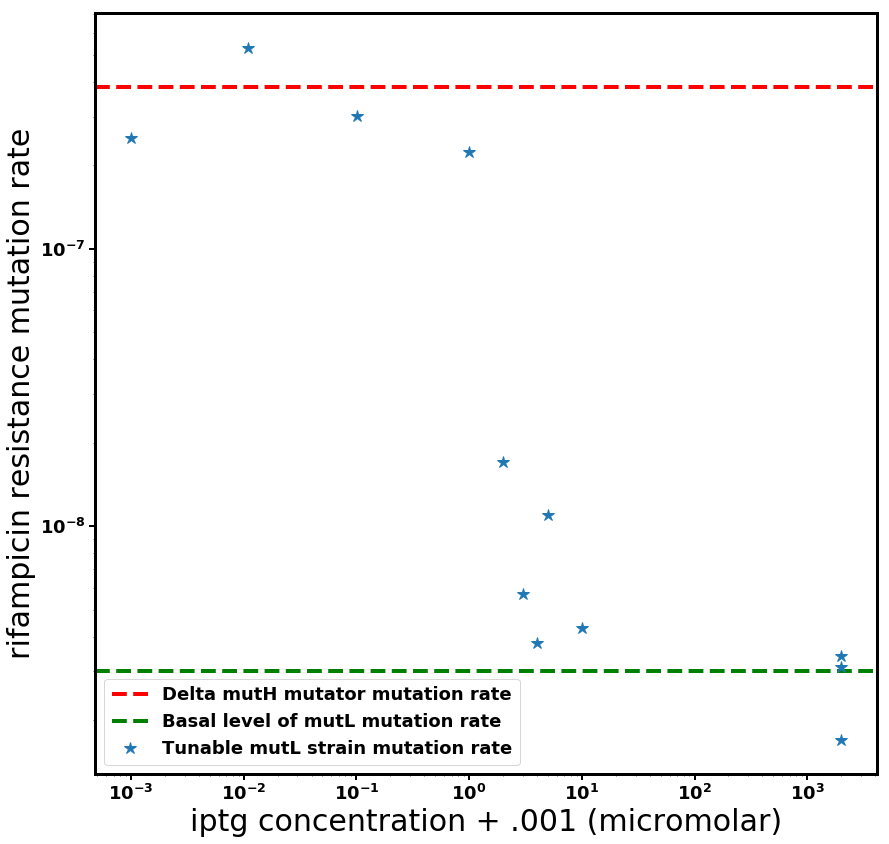

In [2]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 3

iptg_concentrations = np.array([0, .01, .1, 1, 2, 3, 4, 5, 10, 2000, 2000, 2000])+.001
mutation_rates = np.array([250, 531, 301, 224, 17, 5.7, 3.8, 11, 4.3, 3.1, 1.7, 3.4]) * 10**-9
plt.figure(figsize=(14,14));
ax = plt.subplot(111)
ax.tick_params(axis='both',length=6, width=2)
ax.axhline(384*10**(-9), linestyle='dashed', color='red', label='Delta mutH mutator mutation rate', linewidth=4);
ax.axhline(3.0*10**(-9), linestyle='dashed', color='green', label='Basal level of mutL mutation rate', linewidth=4);
ax.loglog(iptg_concentrations, mutation_rates, '*', label='Tunable mutL strain mutation rate', markersize=12);
ax.legend(loc='best');

ax.set_ylabel('rifampicin resistance mutation rate', size=30);
ax.set_xlabel('iptg concentration + .001 (micromolar)', size=30);


In [3]:
from scipy.optimize import curve_fit

In [4]:
def shifted_hill_function(x, K, n, A, c):
    return c + A * 1 / (1 + (K/x)**n)

In [5]:
popt, pcov = curve_fit(shifted_hill_function, iptg_concentrations, mutation_rates)
x = np.linspace(.001, 3000, num=100000)
print(popt)

[  1.09181237e+00   5.45778652e+00  -3.56217873e-07   3.60667813e-07]


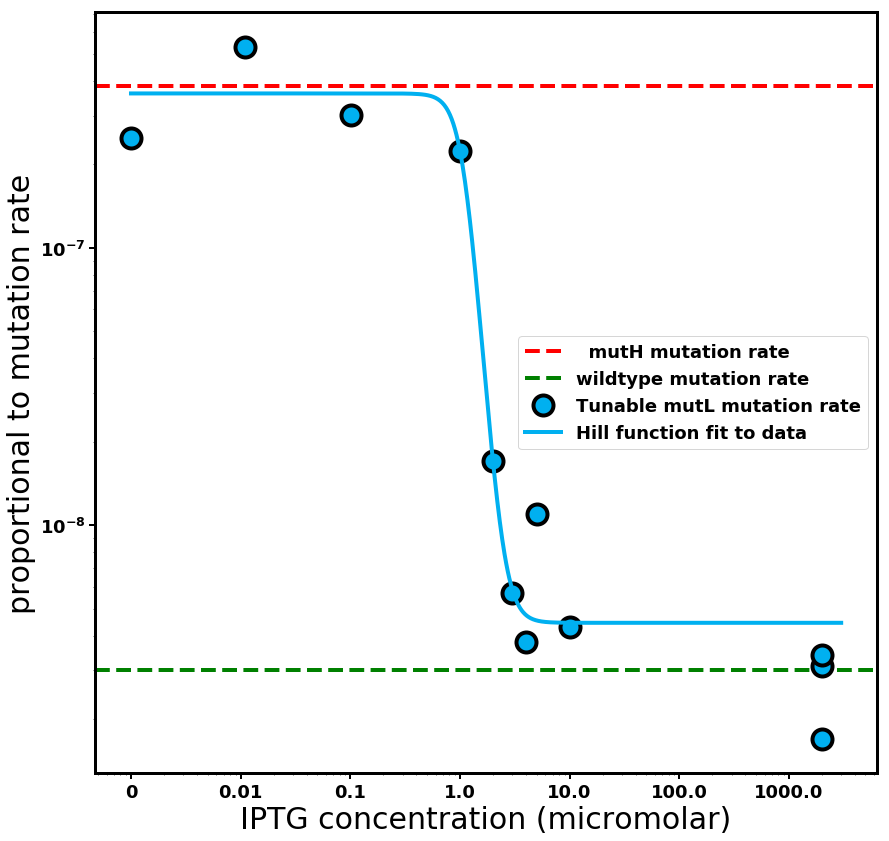

In [9]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 3

iptg_concentrations = np.array([0, .01, .1, 1, 2, 3, 4, 5, 10, 2000, 2000, 2000])+.001
mutation_rates = np.array([250, 531, 301, 224, 17, 5.7, 3.8, 11, 4.3, 3.1, 1.7, 3.4]) * 10**-9
plt.figure(figsize=(14,14));
ax = plt.subplot(111)
ax.tick_params(axis='both',length=6, width=2)
ax.axhline(384*10**(-9), linestyle='dashed', color='red', label='  mutH mutation rate', linewidth=4);
ax.axhline(3.0*10**(-9), linestyle='dashed', color='green', label='wildtype mutation rate', linewidth=4);
ax.loglog(iptg_concentrations, mutation_rates, 'o', label='Tunable mutL mutation rate',
          markersize=20, markeredgecolor=(0,0,0), markerfacecolor=(0, 176/255, 240/255),
          markeredgewidth=4);
ax.loglog(x, shifted_hill_function(x, *popt), color=(0, 176/255, 240/255), linewidth=4,
          label='Hill function fit to data')
a=ax.get_xticks().tolist()
a[2]='0'
ax.set_xticklabels(a)
ax.legend(loc='best');

ax.set_ylabel('proportional to mutation rate', size=30);
ax.set_xlabel('IPTG concentration (micromolar)', size=30);

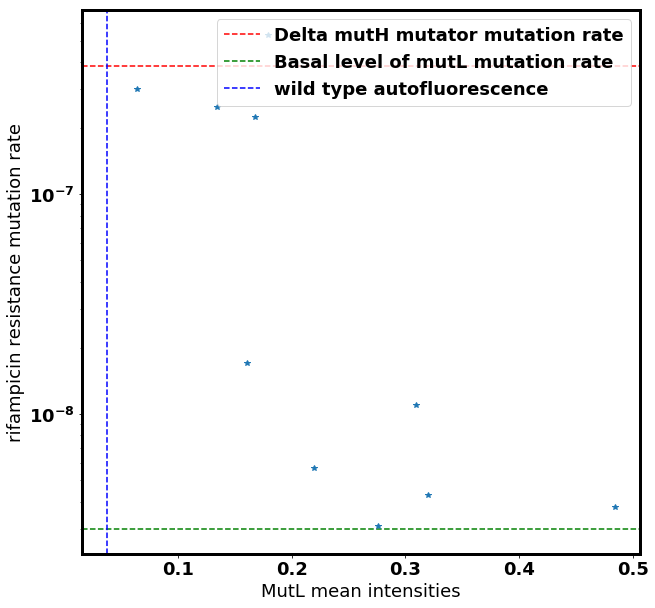

In [7]:
mutL_venus_mean_intensities = np.array([.134,.179,.064,.168,.161,.22,.484,.309,.320,.276])
corresponding_mutation_rates = np.array([250,531,301, 224, 17, 5.7, 3.8, 11, 4.3, 3.1]) * 10**-9
plt.figure(figsize=(10,10));
plt.axhline(384*10**(-9), linestyle='dashed', color='red', label='Delta mutH mutator mutation rate');
plt.axhline(3.0*10**(-9), linestyle='dashed', color='green', label='Basal level of mutL mutation rate');
plt.axvline(.038, linestyle='dashed', color='blue', label='wild type autofluorescence')
plt.semilogy(mutL_venus_mean_intensities, corresponding_mutation_rates,'*')
plt.ylabel('rifampicin resistance mutation rate');
plt.xlabel('MutL mean intensities');
plt.legend(loc='upper right');

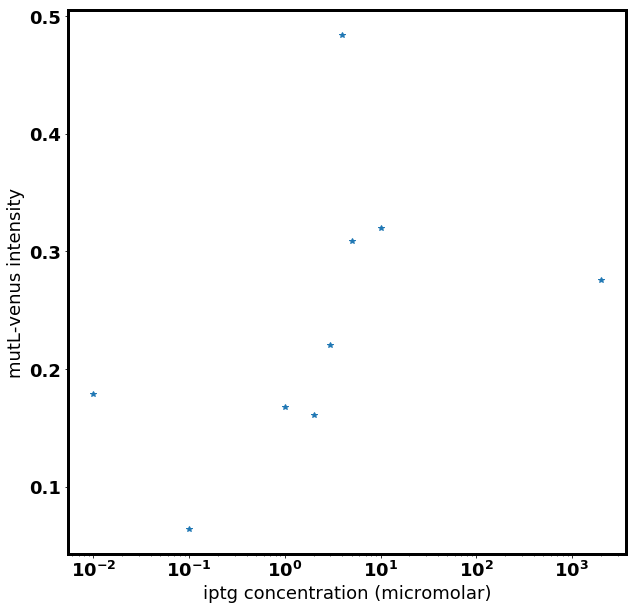

In [8]:
plt.figure(figsize=(10,10));
plt.semilogx([0, .01, .1, 1, 2, 3, 4, 5, 10, 2000], mutL_venus_mean_intensities, '*')
plt.xlabel('iptg concentration (micromolar)');
plt.ylabel('mutL-venus intensity');

In [10]:
print(popt)
print(np.sqrt(np.diag(pcov)))
print('half-saturation, power, amplitude, shift')

[  1.09181237e+00   5.45778652e+00  -3.56217873e-07   3.60667813e-07]
[  2.44030114e-01   9.66067713e+00   5.22940631e-08   4.32407061e-08]
half-saturation, power, amplitude, shift
